<a href="https://colab.research.google.com/github/mayurn344/codesoftprojectml/blob/main/Movie-Genre-Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [4]:
tr_data = pd.read_csv("/content/Untitled Folder/train_data.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], engine='python')
print("Training Data Loaded Successfully ✅")
print(f"Training Data Shape: {tr_data.shape}")
display(tr_data.head())

# Load Test Data (Note: Test data may not contain 'GENRE')
te_data = pd.read_csv("/content/Untitled Folder/test_data.txt", sep=':::', names=['ID', 'TITLE', 'DESCRIPTION'], engine='python')
print("\n✅ Test Data Loaded Successfully")
print(f"📊 Test Data Shape: {te_data.shape}")
display(te_data.head())

# Load Test Data Solution (for evaluation)
te_solution_data = pd.read_csv("/content/Untitled Folder/test_data_solution.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], engine='python')
print("\nTest Solution Data Loaded Successfully ✅")
print(f"Test Solution Data Shape: {te_solution_data.shape}")
display(te_solution_data.head())

Training Data Loaded Successfully ✅
Training Data Shape: (54214, 4)


,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...



✅ Test Data Loaded Successfully
📊 Test Data Shape: (54200, 3)


,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...



Test Solution Data Loaded Successfully ✅
Test Solution Data Shape: (54200, 4)


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


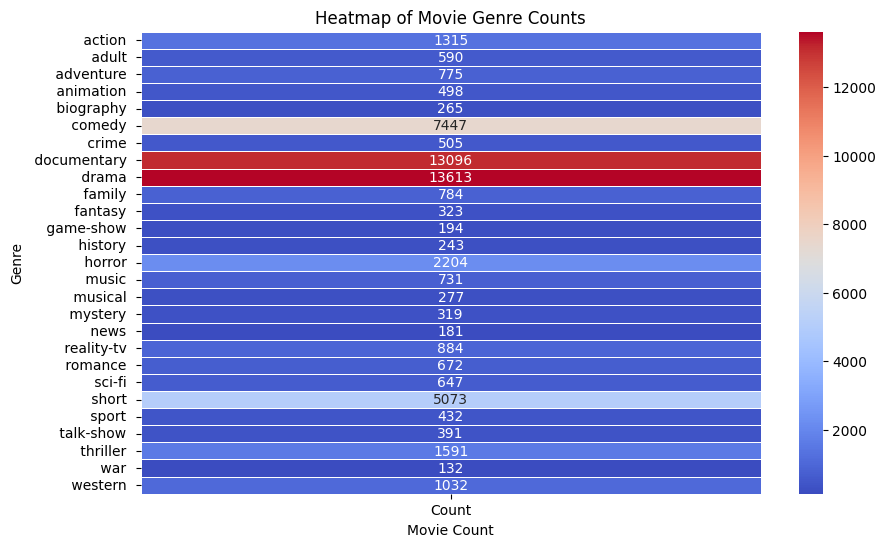

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count occurrences of each genre
genre_counts = tr_data['GENRE'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Convert to pivot table for heatmap
genre_pivot = genre_counts.pivot_table(values='Count', index='Genre', aggfunc='sum')

# Plot Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(genre_pivot, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5, cbar=True)
plt.title("Heatmap of Movie Genre Counts")
plt.xlabel("Movie Count")
plt.ylabel("Genre")
plt.show()


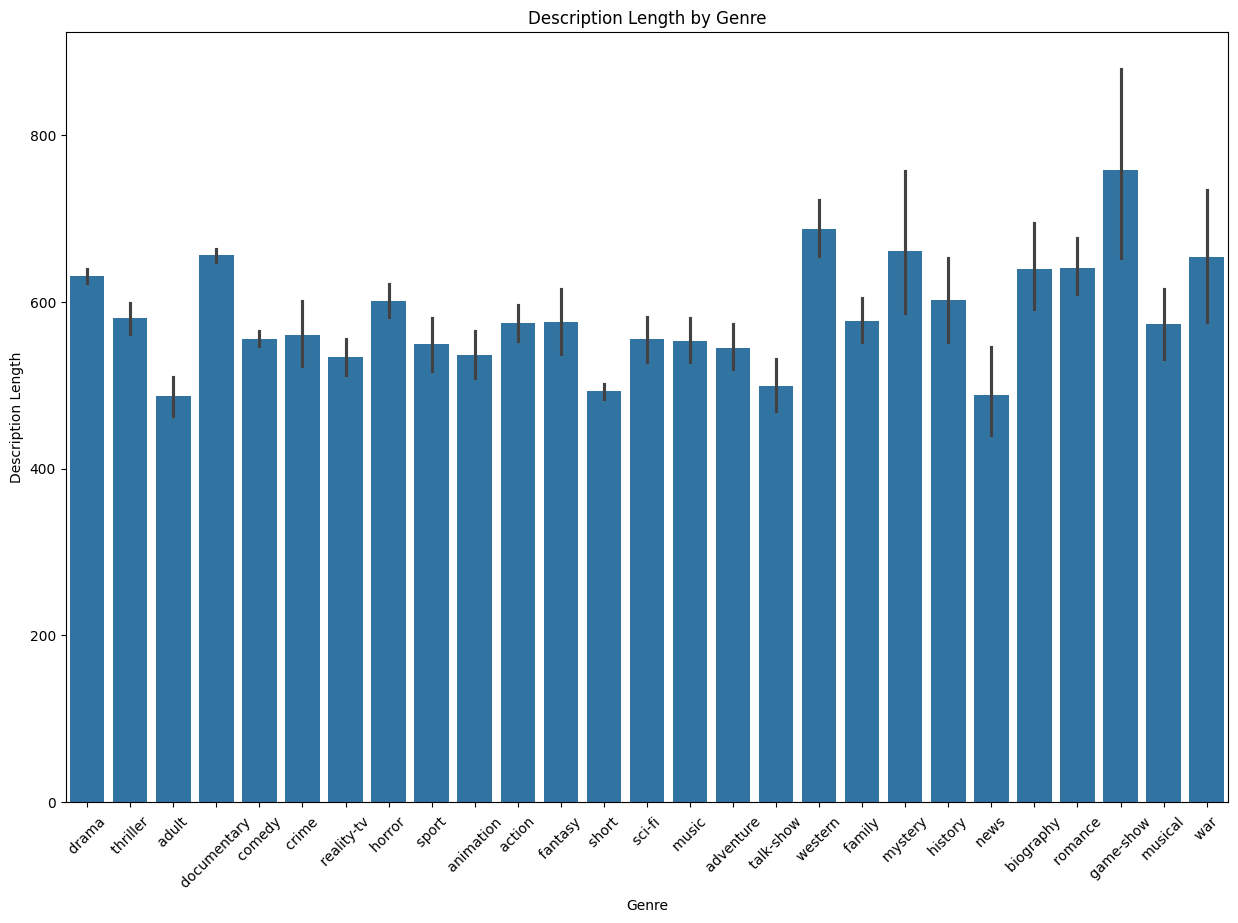

In [6]:
tr_data['DESCRIPTION_length'] = tr_data['DESCRIPTION'].apply(len)
plt.figure(figsize=(15, 10))
sns.barplot(x='GENRE', y='DESCRIPTION_length', data=tr_data)
plt.title('Description Length by Genre')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Description Length')
plt.show()

<ipython-input-7-653243a4074b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette=colors)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


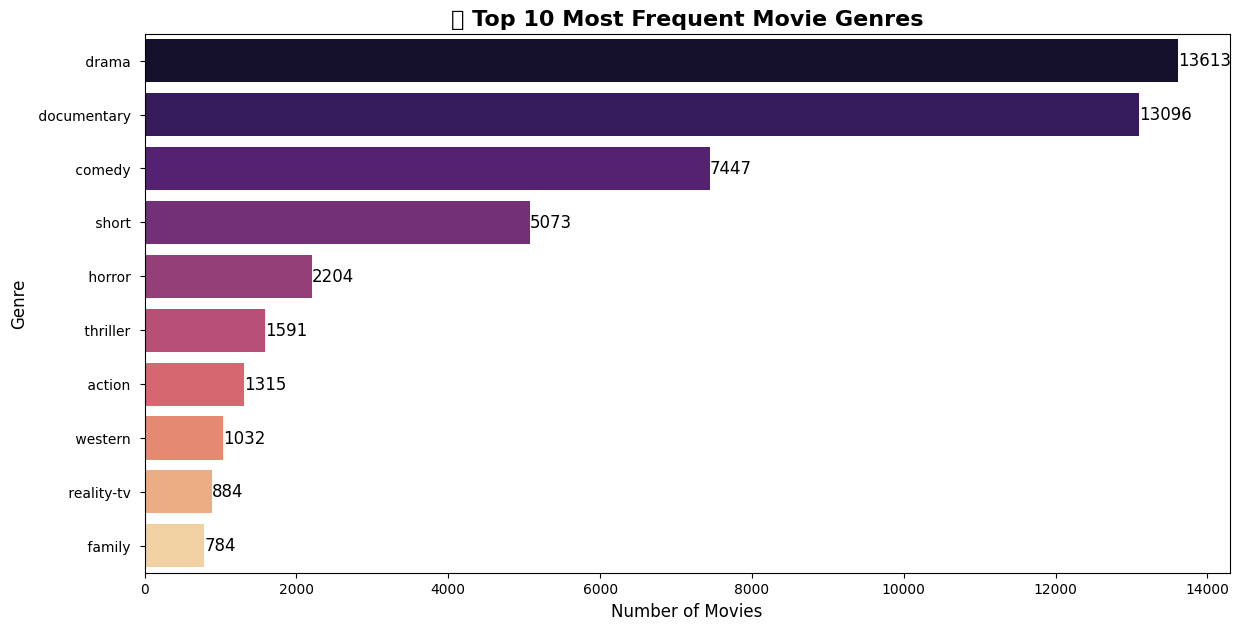

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get top 10 genres
top_genres = tr_data['GENRE'].value_counts().head(10)

# Create figure
plt.figure(figsize=(14, 7))

# Use Seaborn for better aesthetics with gradient color
colors = sns.color_palette("magma", len(top_genres))
sns.barplot(x=top_genres.values, y=top_genres.index, palette=colors)

# Add title and labels
plt.title('🔝 Top 10 Most Frequent Movie Genres', fontsize=16, fontweight='bold')
plt.xlabel('Number of Movies', fontsize=12)
plt.ylabel('Genre', fontsize=12)

# Display values on bars
for index, value in enumerate(top_genres.values):
    plt.text(value + 2, index, str(value), fontsize=12, va='center')

plt.show()


In [8]:
tr_data['DESCRIPTION'].fillna("", inplace=True)
te_data['DESCRIPTION'].fillna("", inplace=True)

t_v = TfidfVectorizer(stop_words='english', max_features=100000)
X_train = t_v.fit_transform(tr_data['DESCRIPTION'])
X_test = t_v.transform(te_data['DESCRIPTION'])

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(tr_data['GENRE'])
y_test = label_encoder.transform(te_solution_data['GENRE'])

<ipython-input-8-8d01088f52e8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tr_data['DESCRIPTION'].fillna("", inplace=True)
<ipython-input-8-8d01088f52e8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [9]:
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

clf = LinearSVC()
clf.fit(X_train_sub, y_train_sub)
y_pred = clf.predict(X_test)
y_val_pred = clf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

Validation Accuracy: 0.5836945494789265
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.32      0.37       263
           1       0.74      0.44      0.55       112
           2       0.45      0.21      0.28       139
           3       0.47      0.15      0.23       104
           4       0.00      0.00      0.00        61
           5       0.53      0.59      0.56      1443
           6       0.39      0.07      0.11       107
           7       0.69      0.81      0.75      2659
           8       0.56      0.72      0.63      2697
           9       0.36      0.17      0.23       150
          10       0.13      0.03      0.04        74
          11       0.82      0.68      0.74        40
          12       0.00      0.00      0.00        45
          13       0.65      0.66      0.66       431
          14       0.61      0.53      0.57       144
          15       0.25      0.04      0.07        50
      

In [10]:
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)

Shape of X_test: (54200, 100000)
Shape of y_test: (54200,)
Shape of y_pred: (54200,)


In [11]:
from sklearn.naive_bayes import MultinomialNB
Mnb_classifier = MultinomialNB()
Mnb_classifier.fit(X_train, y_train)

MultinomialNB()

In [12]:
Mnb_classifier.predict(X_test)

array([8, 8, 7, ..., 8, 8, 7])

In [13]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(max_iter=500)
lr_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [14]:
lr_classifier.predict(X_test)

array([8, 8, 7, ..., 8, 8, 7])

In [15]:
def predict_movie(description):
    """
    Predicts the genre of a movie based on its description.

    Parameters:
        description (str): The movie description.

    Returns:
        str: Predicted genre of the movie.
    """
    # Transform input description using the trained vectorizer
    transformed_desc = t_v.transform([description])

    # Predict genre label
    predicted_label = clf.predict(transformed_desc)

    # Convert label back to genre name
    return label_encoder.inverse_transform(predicted_label)[0]

# Sample movie descriptions
sample_descriptions = [
    "A police officer chases a dangerous criminal and engages in a deadly shootout.",
    "A romantic story where a man tries to win over a girl, but she continuously rejects his proposal."
]

# Predict genres for the sample descriptions
for i, desc in enumerate(sample_descriptions, 1):
    print(f"Sample {i} Prediction: {predict_movie(desc)}")


Sample 1 Prediction:  action 
Sample 2 Prediction:  drama 
